In [ ]:
library(rdmc)
library(tidyverse)
library(ape)
theme_set(cowplot::theme_cowplot(15))
library(patchwork)
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)

In [ ]:
plot_rdmc <- function(file){
    
    all_mods <- vroom::vroom(file, delim = "\t") %>% 
        group_by(model) %>% 
        mutate(mcle = max(cle, na.rm = T) - neut_cle)
    
    best_mcle <- all_mods %>%
      group_by(model) %>%
      summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
      ungroup()  %>%
      arrange(desc(mcle))

    (best_mod <- best_mcle %>% slice(1) %>% pull(model))

    
    
    pos_plot <- all_mods %>%
      group_by(selected_sites, model) %>%
      filter(model == best_mod) %>%
      summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
      ggplot(aes(selected_sites, mcle, colour = model)) +
      geom_line() +
      geom_point() +
      xlab("Position") +
      ylab("Composite likelihood") +
      scale_color_brewer(palette = "Set1")


    #visualize likelihood surface wrt selection coefficients
    sel_plot <- all_mods %>%
      group_by(sels, model) %>%
      filter(model == best_mod) %>%
      summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
      ggplot(aes(log10(sels), mcle, colour = model)) +
      geom_line() +
      geom_point() +
      ylab("Composite likelihood") +
      xlab("Selection coefficient") +
      scale_color_brewer(palette = "Set1") 

    if (best_mod == "standing"){

        #visualize likelihood surface wrt age
        a  <- all_mods %>%
          group_by(times, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(log10(times), mcle, colour = model)) +
          geom_line() +
          geom_point() +
          ylab("Composite likelihood") +
          xlab("Age") +
          scale_color_brewer(palette = "Set1") 


        #visualize likelihood surface wrt age
        b <- all_mods %>%
          group_by(gs, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(gs, mcle, colour = model)) +
          geom_line() +
          geom_point() +
          ylab("Composite likelihood") +
          xlab("Initial allele frequency") +
          scale_color_brewer(palette = "Set1") 

        pos_plot / (sel_plot + (a | b))


    } else if(best_mod == "migration"){
        
         a  <- all_mods %>%
          group_by(migs, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(log10(migs), mcle, colour = model)) +
          geom_line() +
          geom_point() +
          ylab("Composite likelihood") +
          xlab("Migration rate") +
          scale_color_brewer(palette = "Set1") 

        b  <- all_mods %>%
          group_by(sources, model) %>%
          filter(model == best_mod) %>%
          summarise(mcle = max(cle, na.rm = T) - neut_cle) %>%
          ggplot(aes(factor(sources), mcle, colour = model)) +
          geom_point(size = 3) +
          ylab("Composite likelihood") +
          xlab("Source pop") +
          scale_color_brewer(palette = "Set1") 

        pos_plot / (sel_plot + (a | b))

    }


}

../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start2150620_end2231829_pops1-5-10.txt


Rows: 5,700
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'selected_sites', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sels', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'migs', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sources', 'model'. You can override using the `.groups` argument.



../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start3584422_end3643894_pops3-5.txt


Rows: 5,100
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'selected_sites', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sels', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'times', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'gs', 'model'. You can override using the `.groups` argument.



../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start4929927_end5011327_pops1-3-5.txt


Rows: 5,700
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'selected_sites', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sels', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'migs', 'model'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'sources', 'model'. You can override using the `.groups` argument.



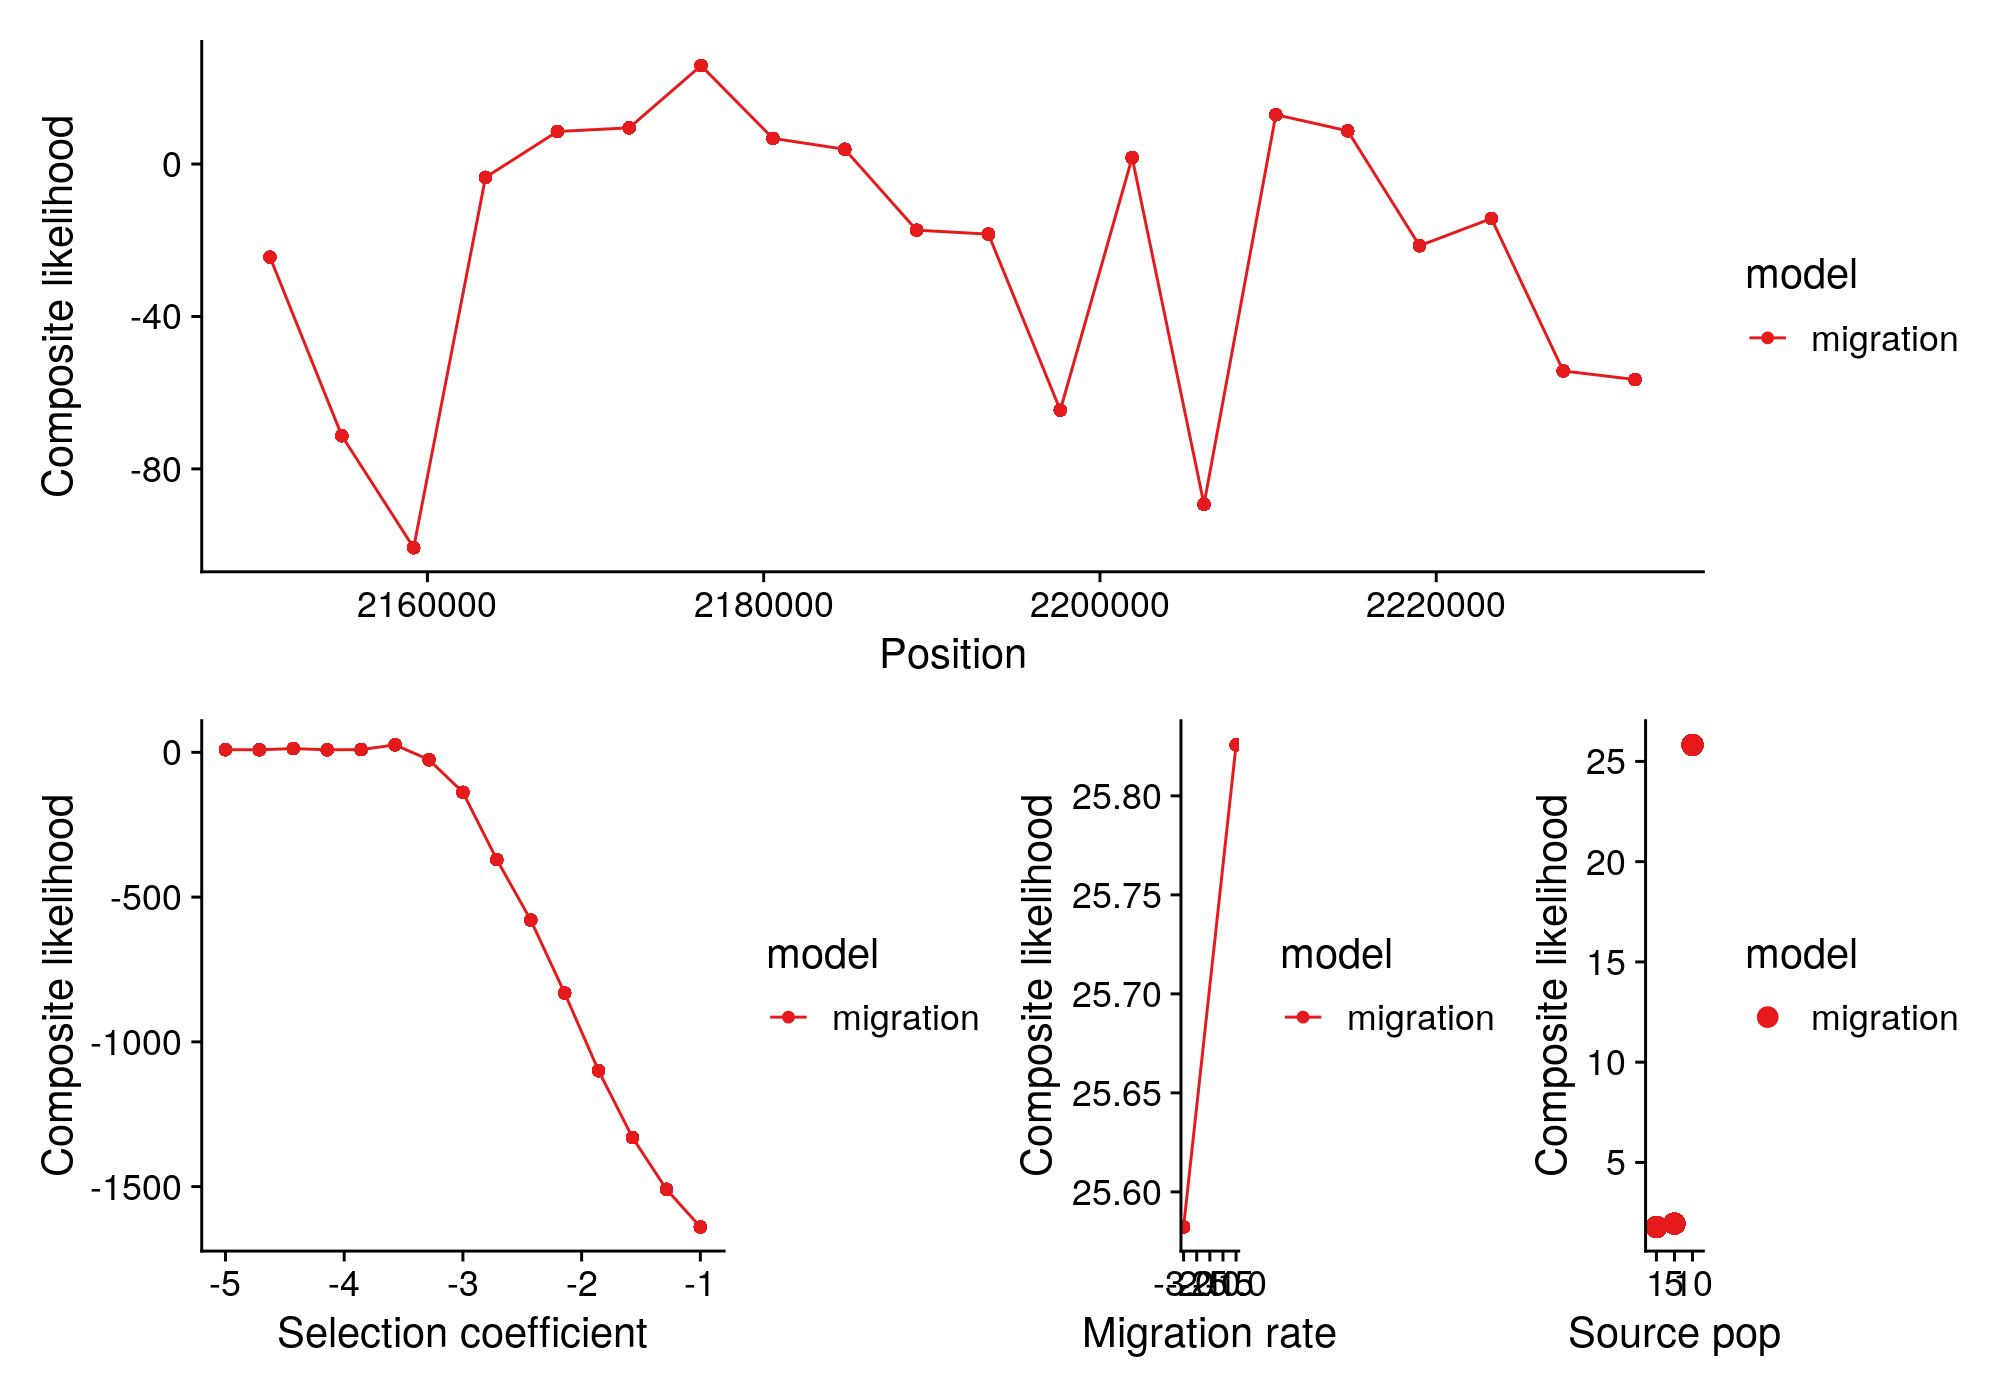

$`../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start2150620_end2231829_pops1-5-10.txt`

$`../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start3584422_end3643894_pops3-5.txt`

$`../data/rdmc/fitted/v5--sweep_chr1--0--308452471_start4929927_end5011327_pops1-3-5.txt`


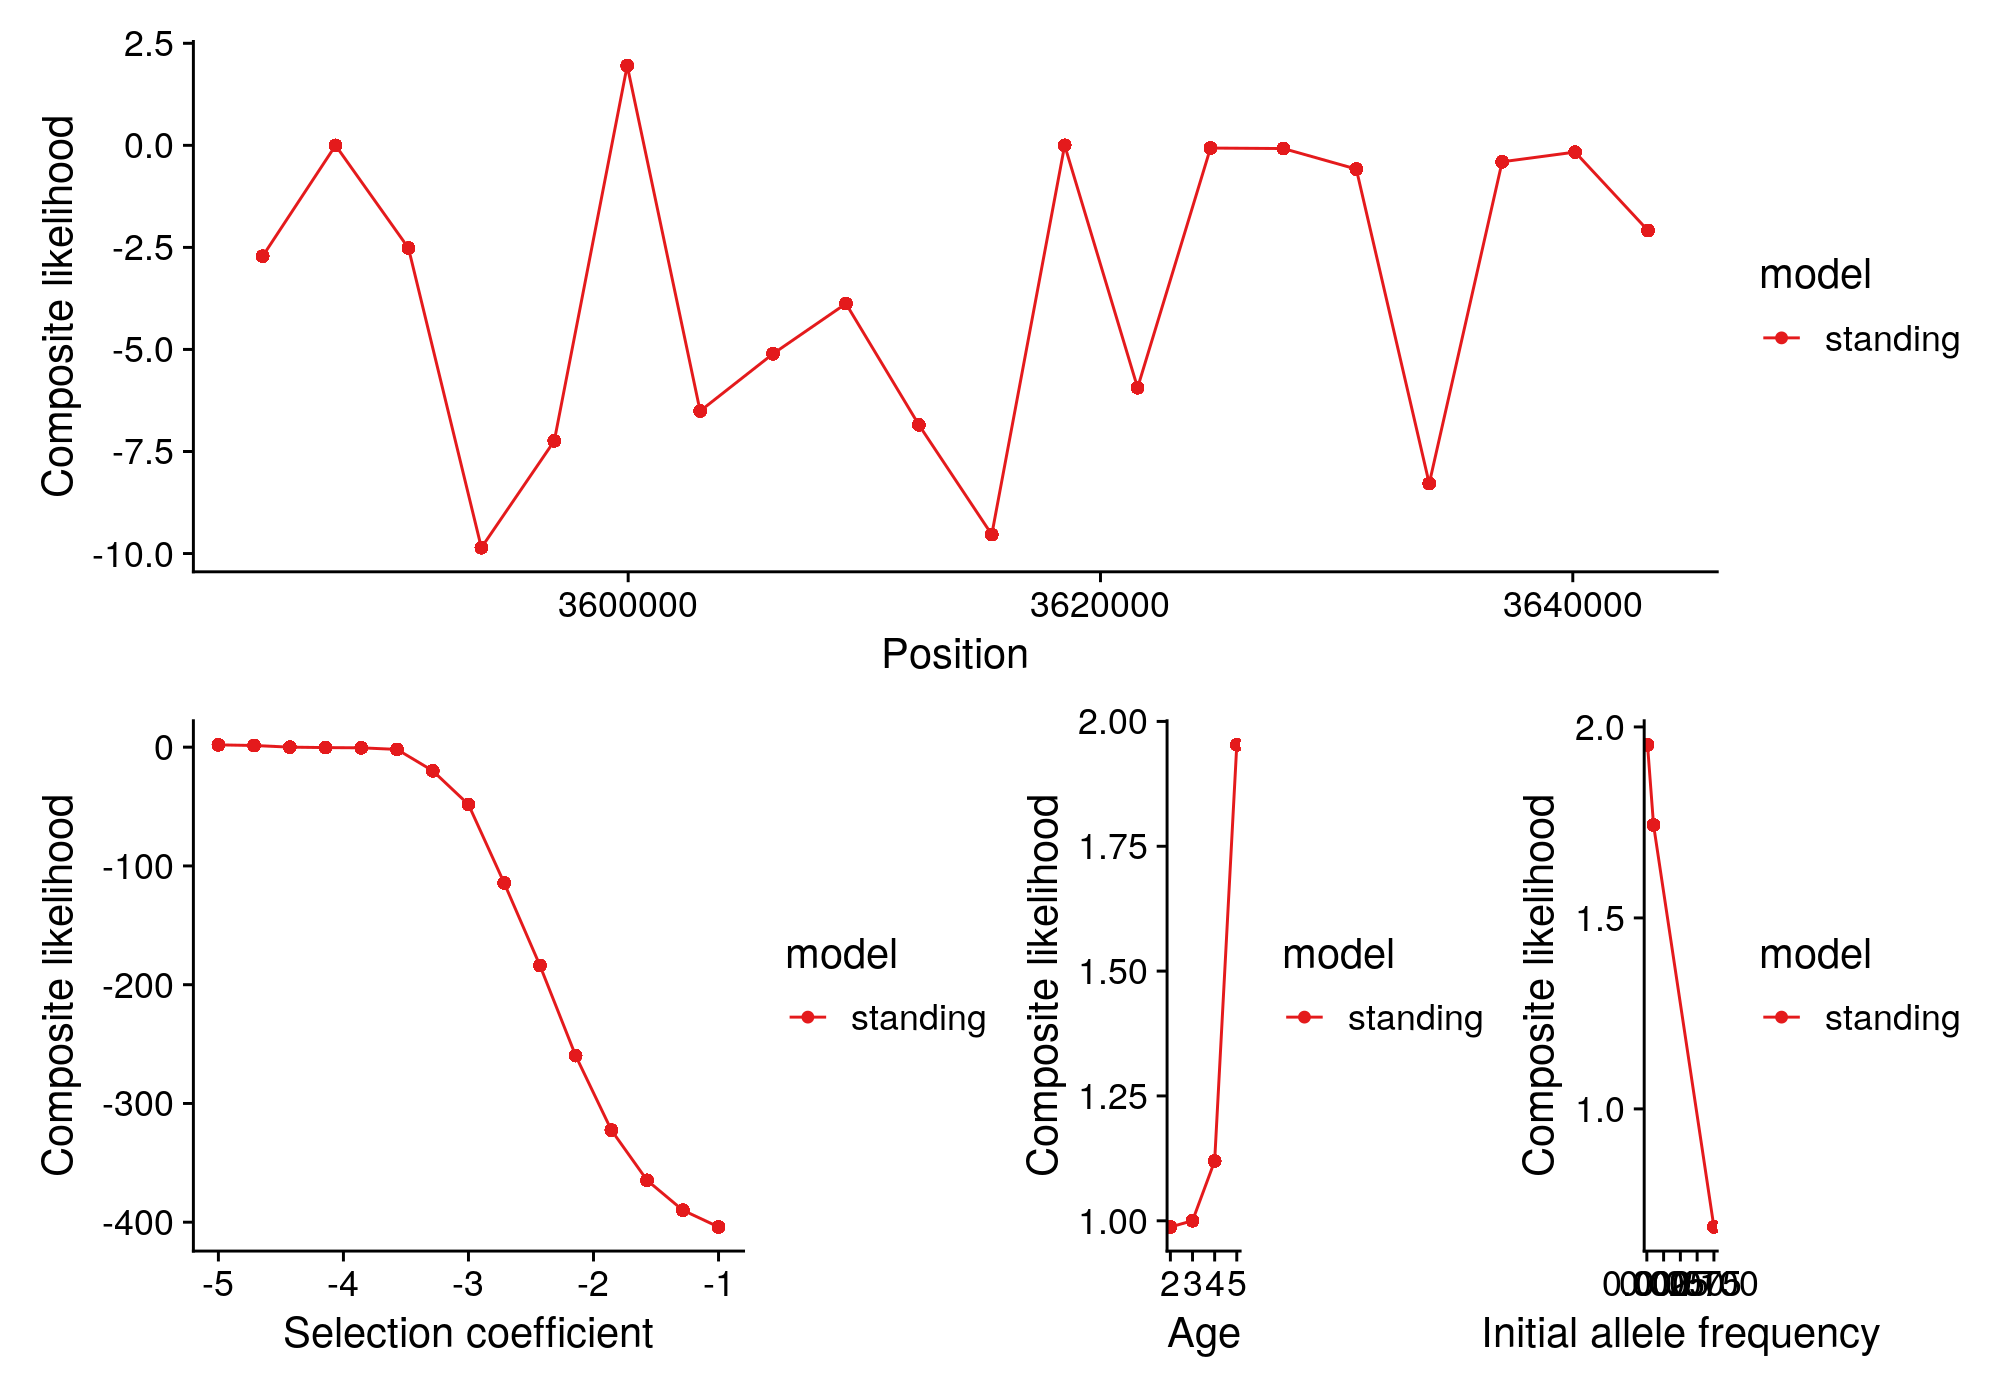

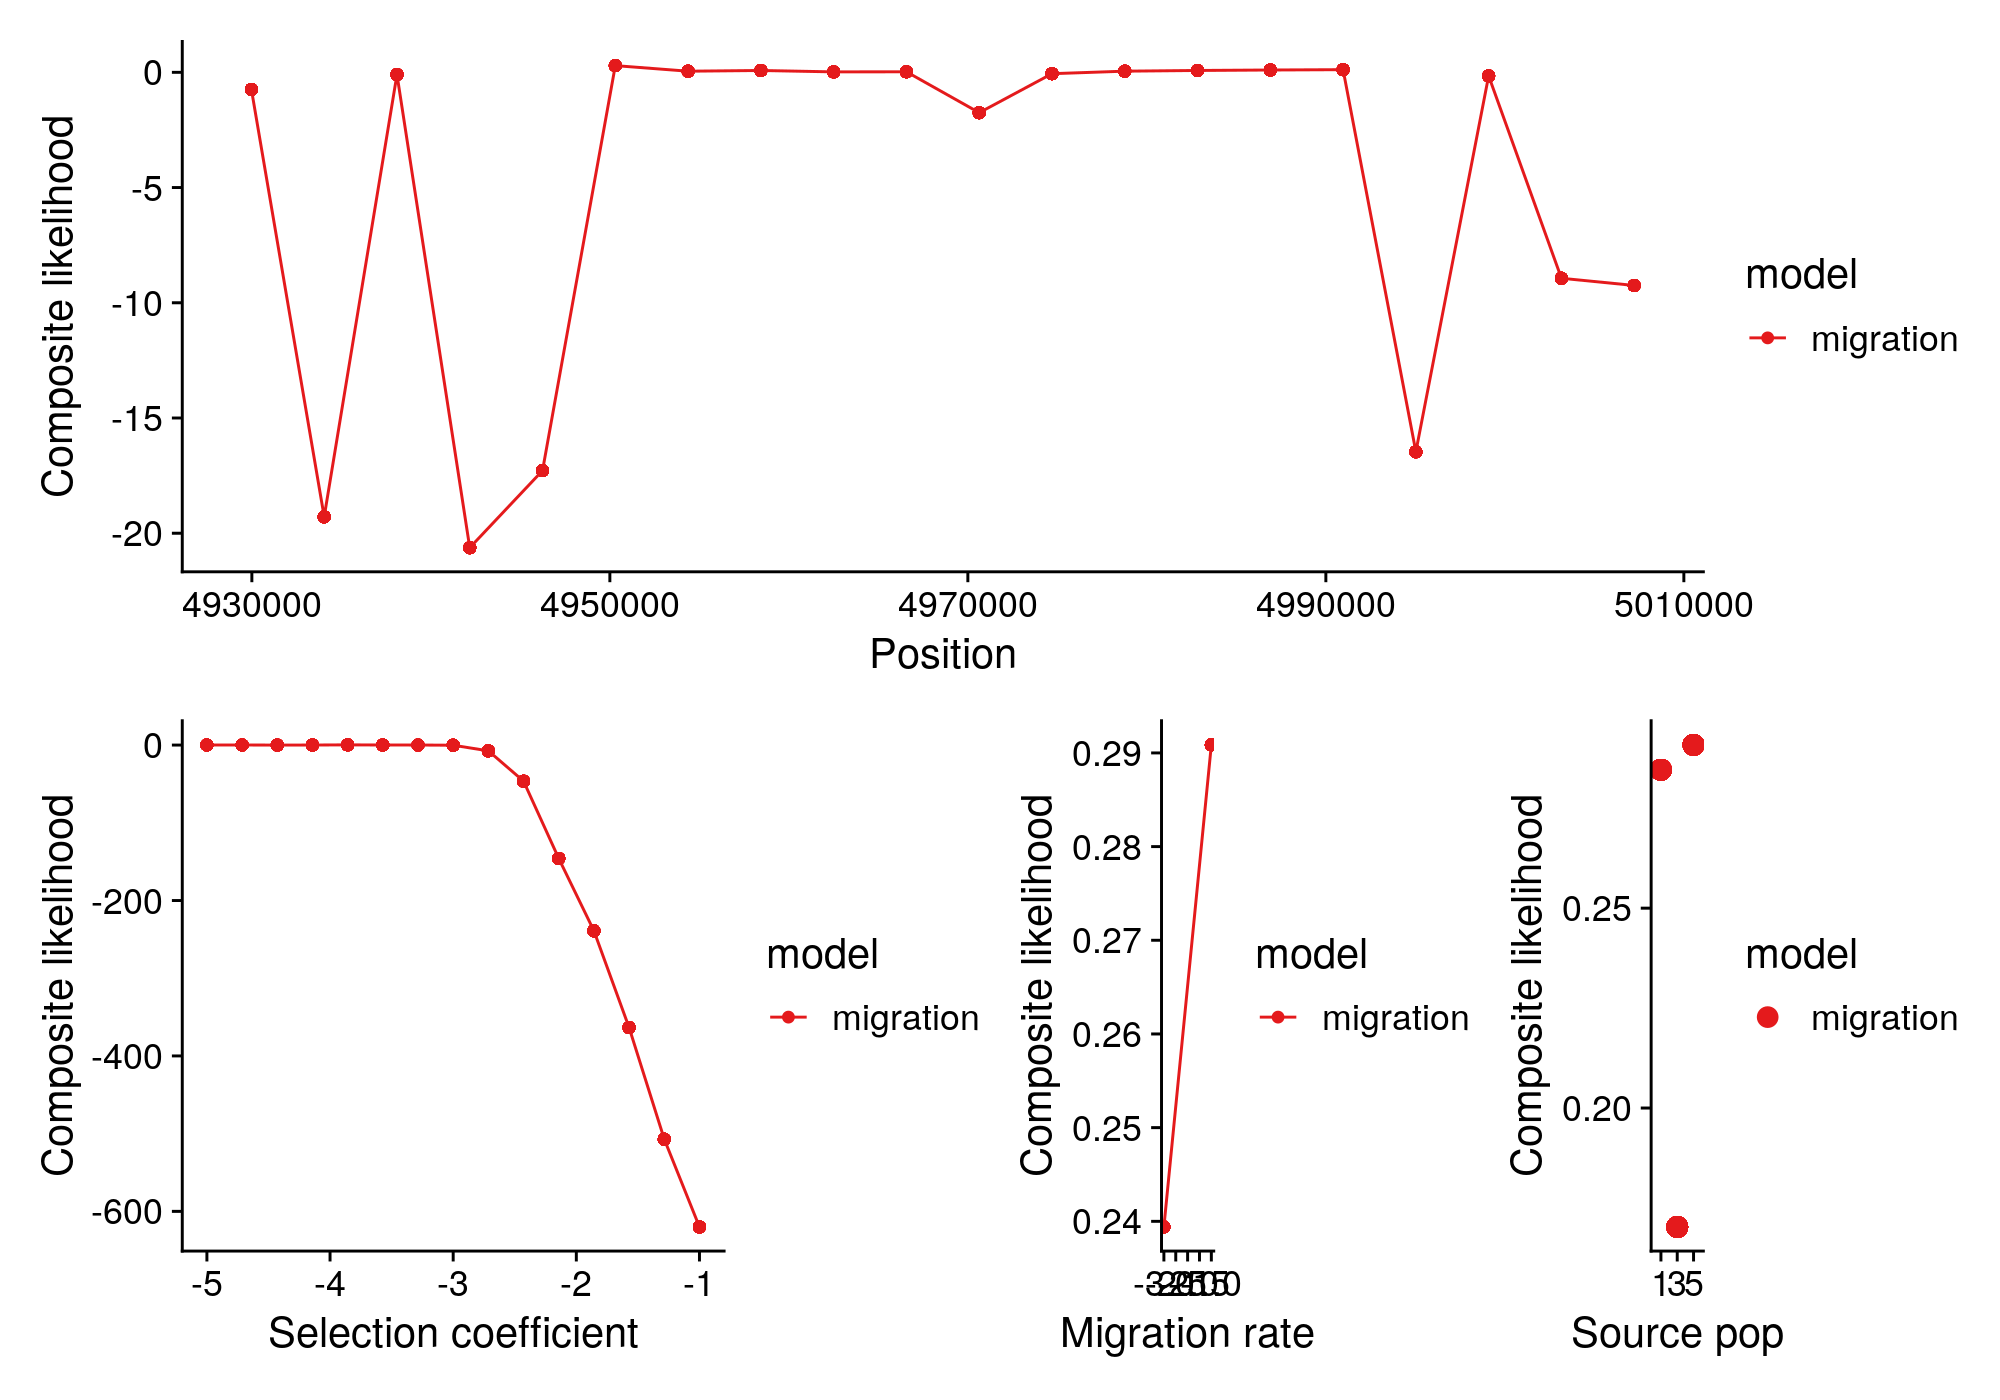

In [42]:
fs::dir_ls(path = "../data/rdmc/fitted/") %>% 
    map(~ {
        print(.x)
        plot_rdmc(.x)
    })

In [43]:
fs::dir_ls(path = "../data/rdmc/fitted/") %>% 
    map_df(~{
            vroom::vroom(.x, delim = "\t") %>% 
            group_by(model) %>% 
            mutate(mcle = max(cle, na.rm = T) - neut_cle) %>%
            ungroup() %>% 
            arrange(desc(mcle)) %>% 
            slice(1)
    })

Rows: 5,700
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 5,100
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 5,700
Columns: 18
Delimiter: "\t"
chr [ 4]: locus, sel_pops, model, sel_pop_ids
dbl [14]: selected_sites, sels, cle, gs, times, migs, sources, neut_cle, n_snps, sweepsize...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message



selected_sites,sels,cle,locus,gs,times,migs,sources,sel_pops,model,sel_pop_ids,neut_cle,n_snps,sweepsize_cM,sweep_rr,sweep_start_bp,sweep_end_bp,sweep_size_bp,mcle
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2150636,1e-05,20501.00,data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start2150620_end2231829_pops1-5-10.txt,NA,NA,0.001,1,1-5-10,migration,v5--LR--Amatlan_de_Canas; v5--LR--San_Lorenzo; v5--Teo--random1_Palmar_Chico,20525.85,1041,0.0660894,1.257716e-08,2150620,2231829,81209,25.8257535
3584522,1e-05,69218.89,data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start3584422_end3643894_pops3-5.txt,0.001,100,NA,NA,3-5,standing,v5--LR--Los_Guajes; v5--LR--San_Lorenzo,69221.61,3666,0.2596523,3.478094e-08,3584422,3643894,59472,1.9531027
4929975,1e-05,18398.44,data/rdmc/sweep_freq/v5--sweep--chr1--0--308452471_start4929927_end5011327_pops1-3-5.txt,NA,NA,0.001,1,1-3-5,migration,v5--LR--Amatlan_de_Canas; v5--LR--Los_Guajes; v5--LR--San_Lorenzo,18399.23,989,0.3394025,4.211860e-08,4929927,5011327,81400,0.2908608
